# COMP1801 Tutorial Week 4 - Multivariable Models
*Dr Peter Soar - 2022/23*

This tutorial will be expanding on the work we did in week two on Linear Regression: revising the vectorised formulation, showing how we can fit multivariable and polynomial models. Finally I will demonstate how categorical features can be included in your models.

For this tutorial, read through and try to understand the text and code examples I have provided (ask your tutor if you have any questions) and there will be a selection of exercises. Attempt these exercises on your own, but do ask your tutor for help if you get stuck.



##0. Do not forget to import all the Python Libraries being used!

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import time # We will be using this to time the efficiency of vectorisation
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the imbuilt sclaing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from mpl_toolkits import mplot3d # Used to make a 3D plot used to demonstrate multidimensional relationships.
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model
from google.colab import files # We will be importing a csv file I have provided for one section.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features

# 1. Vectorization
We can represent our algorithm more concisely using vectorization, which uses vectors, matrices and linear-algebra operations to represent the operations we need to perform when fitting and predicting with our models.

Not only does this simplify the implementation of various tasks, but this vecotised form can also improve the speed of some operations.

Note: if you feel very comfortable with vectors and linear algebra you might want to skip this section

## 1.1. Notation revision

- Bold lower case letters (e.g. $\boldsymbol{v}$) indicate a column vector
$$
\boldsymbol{v} 
= 
\begin{bmatrix}
v_{0} \\
v_{1} \\
\vdots \\
v_{m-1} \\
\end{bmatrix}
$$
- Bold upper case letters(e.g. $\boldsymbol{A}$) indicate a ($m \times n$) matrix 
$$
\boldsymbol{A} 
= \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1} \\
\end{bmatrix}
$$
- The maximum rows (data points for ML) and columns (features for ML) are represented by $m$ and $n$ respectively.



## 1.2. Vector multiplication for linear model prediction

A key operation that vectorisation aids is simplifying the calculations when making predictions from our linear models. 

For a single observed set of feature data we can obtain a prediction using $\hat{y} =\boldsymbol{x} \boldsymbol{\theta}$ where we have

$$
\boldsymbol{x} = 
\begin{bmatrix} 
x_{0} &
x_{1} &
\dots &
x_{m-1} \\
\end{bmatrix},
\boldsymbol{\theta} := 
\begin{bmatrix} 
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{m-1} \\
\end{bmatrix}
$$

Allowing us to work out the single value for the prediction by using matrix multiplication rules:
$$
\hat{y} = \boldsymbol{x} \boldsymbol{\theta} = \sum_{i=0}^{m-1} x_{i} \theta_{i} = x_{0} \theta_{0} + x_{1} \theta_{1} + \cdots+ x_{m-1} \theta_{m-1}
$$


Let us take a simple example where we define $\boldsymbol{x}$ and $\boldsymbol{\theta}$ by
$$
\boldsymbol{x} = 
\begin{bmatrix} 
1 &
3 \\
\end{bmatrix},
\boldsymbol{\theta} = 
\begin{bmatrix} 
-1 \\
2 \\
\end{bmatrix}
$$

Our prediction for this data point would be:

$$
\hat{y} = \boldsymbol{x} \boldsymbol{\theta} = \sum_{i=0}^{1} x_{i} \theta_{i} = x_{0} \theta_{0} + x_{1} \theta_{1} = 1 \times -1 + 3 \times 2 = 5
$$

Let's check this using the computer. 

In the following, we regard $\boldsymbol{x}$ and $\boldsymbol{\theta}$ as 2D `np.array`s with the size of $1 \times 2$ and $2 \times 1$ respecitvely. $\boldsymbol{x} \boldsymbol{\theta}$ is given by the matrix multiplication of $\boldsymbol{x}$ and $\boldsymbol{\theta}$. In NumPy matrix multiplication is given by `@` (or you can use dot product)

In [ ]:
x = np.array([[1, 3]])
th = np.array([[-1],[2]])

y_pred = x @ th
print(y_pred)

[[5]]


## 1.3. Matrix multiplication for linear model prediction

Of course, usually we want to make more than one prediction at a time, which means multiplying the parameters vector by the entire feature matrix such that our predictions are now a vector defined by $\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$.

where
$$
\boldsymbol{X}
= 
\begin{bmatrix} 
1 & x_{1}^{(0)} & x_{2}^{(0)} & \cdots & x_{n-1}^{(0)} \\
1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n-1}^{(1)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1}^{(m-1)} & x_{2}^{(m-1)} & \cdots & x_{n-1}^{(m-1)} \\
\end{bmatrix},
\boldsymbol{\theta}
=
\begin{bmatrix} 
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n-1} \\
\end{bmatrix},
\hat{\boldsymbol{y}}
=
\begin{bmatrix} 
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix},
$$

This means that for each $i = 0, 1, \dots, m-1$ the prediction will be:
$$
\hat{y}^{(i)} = \theta_{0} + x_{1}^{(i)} \theta_{1} + x_{2}^{(i)} \theta_{2} + \dots + x_{n-1}^{(i)} \theta_{n-1}.
$$

### 1.3.1 Exercise 1
Define $\boldsymbol{X}$ and $\boldsymbol{\theta}$ by
$$
\boldsymbol{X} = 
\begin{bmatrix} 
1 & 0 \\
1 & 3 \\
1 & -2 \\
\end{bmatrix},
\boldsymbol{\theta} = 
\begin{bmatrix} 
-1 \\
2 \\
\end{bmatrix}.
$$

Find the prediction vector $\hat{\boldsymbol{y}}$ using matrix multiplication.

To do this we define $\boldsymbol{X}$ and $\boldsymbol{\theta}$ as 2D `np.array`s with the size of $3 \times 2$ and $2 \times 1$, respectively. $\boldsymbol{X} \boldsymbol{\theta}$ is given by the matrix multiplication of $\boldsymbol{X}$ and $\boldsymbol{\theta}$. In NumPy, the matrix multiplication is given by `@`. 
Store the results in `y_pred`.

In [ ]:
##############################################################
# Your code here
##############################################################
x = np.array([
     [1, 0],
     [1, 3],
     [1, -2],
])
th = np.array([
     [-1],
     [2],
])

y_pred = x @ th
print(y_pred)


[[-1]
 [ 5]
 [-5]]


## 1.4 Efficiency of the vectorization.
Vectorization not only simplify the mathematical notation, but also makes calculation more efficient computationally.

In the following, we compare the implementations of the linear regression using the vectorized form and `for` loops.

First, we define the two implementations.

In [ ]:
def linear_prediction_by_vectorization(X, th):
  y_pred = X @ th
  return y_pred

def linear_prediction_by_for_loops(X, th):
  m, n = X.shape
  y_pred = np.zeros([m, 1], dtype=float)
  for i in range(m):
    for j in range(n):
      y_pred[i] += X[i, j] * th[j, 0]
  return y_pred 

In the following, we measure the elapsed time of both implementations, see that the vectorised code is almost twice as fast even on this tiny example. For larger datasets this difference should only become more pronounced.

In [ ]:
x = np.array([[1, 3]])
th = np.arange(x.shape[-1]).reshape([-1, 1]) # An example of the parameter vector.

execution_start_time = time.time()
y_pred_vec = linear_prediction_by_vectorization(x, th)
execution_end_time = time.time()

elapsed_time_by_vectorization = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by vectorization: {elapsed_time_by_vectorization * 1000}ms.')

execution_start_time = time.time()
y_pred_for = linear_prediction_by_for_loops(x, th)
execution_end_time = time.time()

elapsed_time_by_for_loops = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by `for` loops: {elapsed_time_by_for_loops * 1000}ms.')




Elapsed time of linear prediction by vectorization: 0.11897087097167969ms.
Elapsed time of linear prediction by `for` loops: 0.30612945556640625ms.


## 1.4.1 Exercise 2

Apply both methods above (vectorised and loop based prediction) with the california housing data to use the 'Median Income' to predict the 'House Value' (target). Start with a small sample (say 200) for your training data (you don't need to split it into training/new for this exercise), then increase to larger values (the dataset has just over 20000 entries) to see how the timings change.

Note: you may want to use previous tutorials (or examples from later on in this tutorial) for reference for how to correctly load in and process the data for the model. As this is a timing exercise, we don't actually need to fit the model and can use any values for our hypothesis vector $\boldsymbol{\theta}$.

In [ ]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# Use only one feature to start with for univariate linear regression - The Median Income
Xy_df = df[['MedInc','target']]

# So for this task we are going to be predicting the property value based on the Median Income

# prepare NumPy ndarrays
X = np.array(Xy_df[['MedInc']])
y = np.array(Xy_df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 20000 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 500 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)

th = np.arange(X_train.shape[-1]).reshape([-1, 1]) # An example of the parameter vector.

execution_start_time = time.time()
y_pred_vec = linear_prediction_by_vectorization(X_train, th)
execution_end_time = time.time()

elapsed_time_by_vectorization = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by vectorization: {elapsed_time_by_vectorization * 1000}ms.')

execution_start_time = time.time()
y_pred_for = linear_prediction_by_for_loops(X_train, th)
execution_end_time = time.time()

elapsed_time_by_for_loops = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by `for` loops: {elapsed_time_by_for_loops * 1000}ms.')

Elapsed time of linear prediction by vectorization: 0.3199577331542969ms.
Elapsed time of linear prediction by `for` loops: 216.8748378753662ms.


#2. Multivariable regression

In tutorial 2 we were primarily working with simple univariate linear regression where we fit a model predicting:
$$\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$$

where the vectorised form our univariate linear model will look like this:
$$
\begin{bmatrix} 
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix} = \begin{bmatrix} 
1 & x_{1}^{(0)}  \\
1 & x_{1}^{(1)}  \\
\vdots & \vdots  \\
1 & x_{1}^{(m-1)} \\
\end{bmatrix}\begin{bmatrix} 
\theta_{0} \\
\theta_{1} \\
\end{bmatrix}
$$

Where the column of 1's are needed to correspond with the constant parameter $\theta_0$ used by the model (Note: we don't have to account for this when using sklearn `fit` model functionality).

For multivariate linear regression we can still summarise our model as $\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$ in matrix form, but when expanded the feature matrix and parameter vector expand to account for the extra features:
$$
\begin{bmatrix} 
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix} = \begin{bmatrix} 
1 & x_{1}^{(0)} & x_{2}^{(0)} & \cdots & x_{n-1}^{(0)} \\
1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n-1}^{(1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1}^{(m-1)} & x_{2}^{(m-1)} & \cdots & x_{n-1}^{(m-1)} \\
\end{bmatrix}\begin{bmatrix} 
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n-1} \\
\end{bmatrix}
$$


Multivariate models such as this are far more common as the accuracy that can be obtained using a single variable is usually quite limited in the real world, as there are often many relationshsips between many features which dictate the full behaviour observed in the target values being predicted during supervised learning.

## 2.1. Univariate Example Revision



Below I am going to reproduce the code I provided in week 2 showing how to fit a univarate regression model of the median income vs the house value for the california housing dataset - hopefully you all recognise this code and understand all the functions.

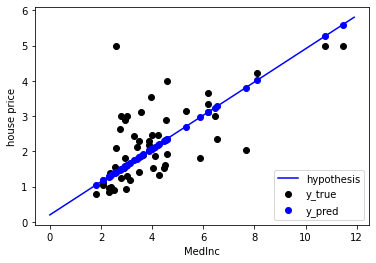

Mean squared error loss: 0.7799
R2 score: 0.3625


In [ ]:
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# Use only one feature to start with for univariate linear regression - The Median Income
Xy_df = df[['MedInc', 'target']]

# So for this task we are going to be predicting the property value based on the Median Income

# prepare NumPy ndarrays
X = np.array(Xy_df[['MedInc']])
y = np.array(Xy_df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 200 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot outputs
plt.scatter(X_new, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new, y_pred, color='blue', label='y_pred') # predicted y values
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis') # Regression line
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))


## 2.2 Multivariate example

It is actually very straightforward to expand this code to handle a multivariate model - all we need to do is add more feature columns to the `X` array and everything else will continue to work the same. Below I will add the `HouseAge` feature to the model.

In [ ]:
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# Now using two features for multiivariate linear regression - The Median Income and the House Age
Xy_df = df[['MedInc', 'HouseAge', 'target']]

# So for this task we are going to be predicting the property value based on the Median Income

# prepare NumPy ndarrays
X = np.array(Xy_df[['MedInc', 'HouseAge']]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y = np.array(Xy_df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 200 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))


Mean squared error loss: 0.7009
R2 score: 0.4270


While still not a great model, we can see that the $R^2$ score has increased by a clear amount, so our two variable model is describing more of the variation than the univariate case. You may have noticed that in the code above I didn't output any graphs. When we move into multivariate cases we begin to encounter problems when it comes to visualising our results as we can only have one feature variable on the `x` axis. I have also removed the regrssion line for the plot, as we cannot really draw a multivariate regrerssion line that tells us much useful information in a 2D plane like this.

So we could make a graph of Median Income vs price:

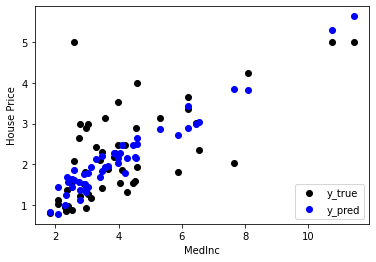

In [ ]:
X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

Or the House Age vs the price:

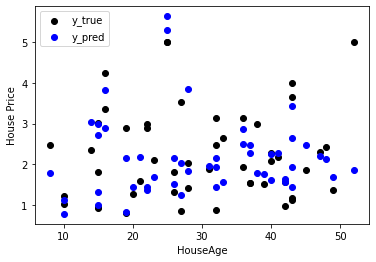

In [ ]:
X_new_disp = X_new[:,1] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('HouseAge')
plt.ylabel('House Price')
plt.legend()
plt.show()

It is fine to keep an eye on how well you are predicting the target variables vs any of the features that you are using such as this, as providing your model is describing more of the variation, the predicted and true values should begin matching more closely. However, never forget that you are summarising a complex, multivariate relationship down to a simple set of 2D axes containing only one of those features, and while exploring multiple plots of different features can be a good exercise, it really isn't practical for more complex models.

While drawing a regression line isn't that helpful for a multivariate model, for a two featured model such as this we will in fact have a regression plane (or surface) that we can actually visualise (much like with the optimisation methods last week, going higher than this means things would have to be represented in higher dimensions which we can't easily visualise).

Below I have made a 3D plot which shows the true relationship for our fitted model of Income & House Age vs House Price. Try moving the plot around (the `ax.view_init` line) to get a better idea of how these three variables are related

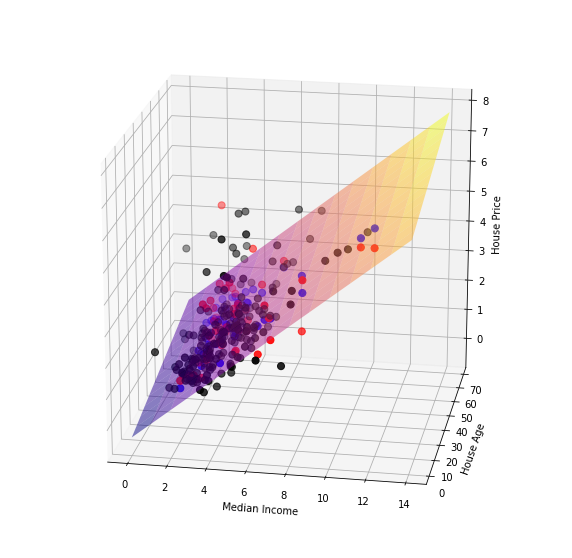

In [ ]:
# Creating dataset
x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14]], dtype='f') # X value range
y = np.array([[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]], dtype='f') # y value range
z = obj.intercept_+obj.coef_[0]*x+obj.coef_[1]*y # this is the function for the 2D regression surface, note that I am using the coefficients of our fitted model object
 
# Creating figure
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z, cmap="plasma", alpha=0.5) # Our regression surface

ax.scatter(X_train[:,0],X_train[:,1],y_train, c="black",s=50) # Training Data
ax.scatter(X_new[:,0],X_new[:,1],y_true, c="red",s=50) # True Values
ax.scatter(X_new[:,0],X_new[:,1],y_pred, c="blue",s=50) # Predicted Values
 
ax.view_init(elev=20, azim=280) # Change these variables to get a different view of the 3D plot

ax.set_xlabel("Median Income")
ax.set_ylabel("House Age")
ax.set_zlabel("House Price")

# show plot
plt.show()

## 2.2.1 Exercise 3

Try adding more features to the multivariate model for the California housing data.

1.   Try adding all of the features at once. How does the accuracy of this model compare to the previous models with less features?
2.   Now try adding (or taking away) features one at a time. Do they all contribute to the models accuracy?
3. Once you've chosen a final model, try increasing the size of your sample in increments (training and testing should both be increased approximately in proportion, this dataset has just over 20000 datapoints). Does the accuracy of your model change much? Is there anything concerning you spot about some of your predictions?



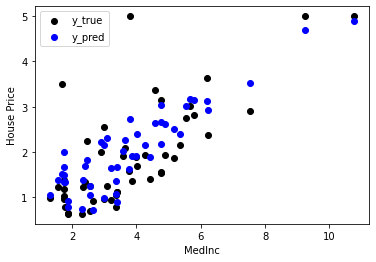

Mean squared error loss: 0.4050
R2 score: 0.6757


In [ ]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# So for this task we are going to be predicting the property value based on the Median Income
col = house['feature_names'] # prepare NumPy ndarrays

col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
X = np.array(df[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y = np.array(df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 250 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)


# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

# 3. polynomial features


So far we have only considered linear relationships between our variables, however that is not always the case - considering the power of a variable (say $\theta_2^2$) or the interactions between variables (say $\theta_2 \theta_3$) may describe the relationship between the variables and the target more accurately than any linear combination of those variables is able too.

As a group these are known as *polynomial features*, and can be easily created in sklearn by creating a `sklearn.preprocessing.PolynomialFeatures` [instance](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures).


For the following examples we will continue using the California Housing Dataset, we will be going back to only considering `MedInc` as a feature to lower computational costs and make the examples clearer.

In [ ]:
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# prepare NumPy ndarrays
X = np.array(df[['MedInc']])
y = np.array(df['target'])

n_train_points = 50
n_new_points = 10

# Split the data into training/new data
# We virtually assume that we have 50 feature-target pairs and are going to predict the target values of 10 instances.
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

# Split the targets into training/new data
y_train = y[:n_train_points]

##3.1 Initialising the Polynomial features:

Using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) is another preprocessing step, and is very similar to the feature scaling we looked at last week.

- Initialize the polynomial features object.
  - Method: `PolynomialFeatures(degree)`
  - Input parameter: Maximum polynomial degree you want for your model (this is really a hyperparameter we need to choose carefully, but we will cover how to best pick this degree next week).
- Output: Creates a new feature matrix with polynomial features.
  - Method: `poly.fit_transform` 
  - Example: Let 
  $$\begin{bmatrix} \tilde{\boldsymbol{x}}_{1} \end{bmatrix} 
  = \begin{bmatrix} x_{1}^{(0)} \\ x_{1}^{(1)} \\ \vdots \\ x_{1}^{(m - 1)} \end{bmatrix}$$ be the feature matrix. Then, the feature matrix created by the instance `PolynomialFeatures(3)` is 
  $$\begin{bmatrix} \tilde{\boldsymbol{x}}_{1} & (\tilde{\boldsymbol{x}}_{1})^2 & (\tilde{\boldsymbol{x}}_{1})^3 \end{bmatrix} 
  = \begin{bmatrix} x_{1}^{(0)} & (x_{1}^{(0)})^2 & (x_{1}^{(0)})^3 \\ x_{1}^{(1)} & (x_{1}^{(1)})^2 & (x_{1}^{(1)})^3 \\ \vdots & \vdots & \vdots \\ x_{1}^{(m - 1)} & (x_{1}^{(m - 1)})^2 & (x_{1}^{(m - 1)})^3 \end{bmatrix}$$


In [ ]:
degree = 3 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train) # Fit the poly object to the training data to make a new feature matrix
print(X_train_poly) # View the new feature matrix - do you understand what's happening?

[[1.00000000e+00 3.36870000e+00 1.13481397e+01 3.82284782e+01]
 [1.00000000e+00 2.16600000e+00 4.69155600e+00 1.01619103e+01]
 [1.00000000e+00 1.56420000e+00 2.44672164e+00 3.82716199e+00]
 [1.00000000e+00 3.68850000e+00 1.36050322e+01 5.01821615e+01]
 [1.00000000e+00 9.74490000e+00 9.49630760e+01 9.25405679e+02]
 [1.00000000e+00 1.68330000e+00 2.83349889e+00 4.76962868e+00]
 [1.00000000e+00 3.37130000e+00 1.13656637e+01 3.83170620e+01]
 [1.00000000e+00 4.64630000e+00 2.15881037e+01 1.00304806e+02]
 [1.00000000e+00 3.97500000e+00 1.58006250e+01 6.28074844e+01]
 [1.00000000e+00 7.90130000e+00 6.24305417e+01 4.93282439e+02]
 [1.00000000e+00 5.54560000e+00 3.07536794e+01 1.70547604e+02]
 [1.00000000e+00 2.73610000e+00 7.48624321e+00 2.04831100e+01]
 [1.00000000e+00 2.08020000e+00 4.32723204e+00 9.00150809e+00]
 [1.00000000e+00 4.39770000e+00 1.93397653e+01 8.50504858e+01]
 [1.00000000e+00 2.70720000e+00 7.32893184e+00 1.98408843e+01]
 [1.00000000e+00 2.04690000e+00 4.18979961e+00 8.576100

## 3.2 Fit `sklearn`'s `LinearRegression` instance to the polynomial features.
It is a good idea to perform feature scaling on our polynomial features and we can fit a regression model the same as we did for our multivariable models earlier.
1. Standardize the polynomial features and store it to `X_train_poly_stded`.
2. Create `LinearRegression` instance `reg` and fit the object to `X_train_poly_stded`.


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_poly_stded, y_train)

LinearRegression()

## 3.3 Make prediction on the fitted object on the new data using polynomial features. 

We can make predictions with our polynomial features in the same way that we used for the multivariable model. Remember that we have to perform any preprocessing steps (feature scaling, polynomial features, etc) to the `new` data, but remember we do not `fit` on the new data, we **only** ever `transform` the `new` data.


In [ ]:
X_new_poly = poly.fit_transform(X_new) # create Polynomial features for X_new
X_new_poly_stded = scaler.transform(X_new_poly) # standardize X_new_poly
y_pred = reg.predict(X_new_poly_stded) # Store our predictions
display(y_pred) # Display our predicted values

array([1.25421492, 1.25447915, 1.62697705, 1.68348554, 2.2726985 ,
       1.36268123, 1.61713622, 1.25531664, 1.44834635, 1.81444099])

## 3.4 What is our cost function for the training data?
How much of the variation in our training data is being described by our model with polynomial features? We can check this by making a prediction with our training data and calculating the mean squared error against the `y_train` and the $R^2$ score. We should see that we are describing quite a lot of variation with just this one feature now.

Note: Remember that here we are fitting checking the accuracy against the **training** data, but usually we check our evaluation metrics against our testing data as this is a better indication of our models accuracy. The reason we are fitting against the train data will become clear soon.



In [ ]:
y_pred = reg.predict(X_train_poly_stded) # Make our predictions of the training data
mse = sklearn.metrics.mean_squared_error(y_train, y_pred) # calculate the MSE
print(mse)
R2 = sklearn.metrics.r2_score(y_train, y_pred) # calculate the MSE
print(R2)

0.5900912539789069
0.5801267857667527


Let's try plotting this and see what our hypothesis looks like based on the polynomial feature.

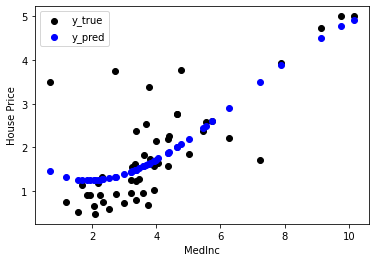

In [ ]:
# Plot outputs
plt.scatter(X_train[:,0], y_train,  color='black', label='y_true') # Observed y values
plt.scatter(X_train[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

This looks good, can we get an even better fit using a higher degree of polynomial features?

## 3.5 Exercise 4
Change the degree of the polynomial features, how does the MSE change as the degree increases?

Note: You can do this by hand, but a nicer solution would involve setting up a loop which allows you to perform an automatic parametric test on this parameter.

degree: 0, mean squared error: 1.4054034264998396.
degree: 1, mean squared error: 0.6523341395523339.
degree: 2, mean squared error: 0.602920302671285.
degree: 3, mean squared error: 0.5900912539789069.
degree: 4, mean squared error: 0.5099625609473445.
degree: 5, mean squared error: 0.4402358720847741.
degree: 6, mean squared error: 0.43970821805057414.
degree: 7, mean squared error: 0.433999375873014.
degree: 8, mean squared error: 0.3889164471532896.
degree: 9, mean squared error: 0.387406202976861.
degree: 10, mean squared error: 0.3743760032431733.
degree: 11, mean squared error: 0.3702176006045339.
degree: 12, mean squared error: 0.3700711017247793.
degree: 13, mean squared error: 0.3588691180588952.
degree: 14, mean squared error: 0.35886911404237926.
degree: 15, mean squared error: 0.35871238089377067.
degree: 16, mean squared error: 0.35810271520695464.
degree: 17, mean squared error: 0.32958903619478347.
degree: 18, mean squared error: 0.33063428689036956.
degree: 19, mean sq

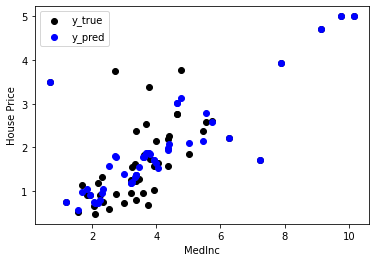

Mean squared error loss: 0.2966
R2 score: 0.7889


In [ ]:
##############################################################
# Your code here
##############################################################


for degree in range(30):
  poly = PolynomialFeatures(degree)
  X_train_poly = poly.fit_transform(X_train)
  scaler = StandardScaler()
  scaler.fit(X_train_poly)
  X_train_poly_stded = scaler.transform(X_train_poly)
  reg = sklearn.linear_model.LinearRegression()
  reg.fit(X_train_poly_stded, y_train)
  y_pred = reg.predict(X_train_poly_stded)
  mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
  print(f'degree: {degree}, mean squared error: {mse}.')

# Plot outputs
plt.scatter(X_train[:,0], y_train,  color='black', label='y_true') # Observed y values
plt.scatter(X_train[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()


# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_train, y_pred)))

## 3.6 Exercise 5
We should be getting really quite accurate now! It stands to reason that we can get even higher if we make our model multivariate. Try implementing a multivariate regression model (using `MedInc` and `HouseAge`) on the california housing dataset that uses polynomial features, see how low you can get the MSE and how much you can raise the $R^2$ score.



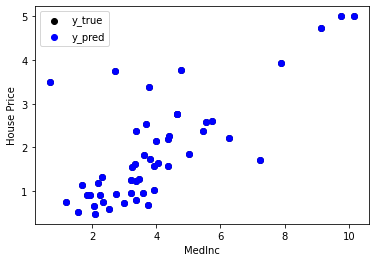

Mean squared error loss: 0.0000
R2 score: 1.0000


In [ ]:
##############################################################
# Your code here
##############################################################
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# prepare NumPy ndarrays
X = np.array(df[['MedInc', 'HouseAge']])
y = np.array(df['target'])

n_train_points = 50
n_new_points = 10

# Split the data into training/new data
# We virtually assume that we have 50 feature-target pairs and are going to predict the target values of 10 instances.
X_train = X[:n_train_points]

# Split the targets into training/new data
y_train = y[:n_train_points]

degree = 10 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train) # Fit the poly object to the training data to make a new feature matrix

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train_poly_stded, y_train)

y_pred = reg.predict(X_train_poly_stded) # Store our predictions

# Plot outputs
plt.scatter(X_train[:,0], y_train,  color='black', label='y_true') # Observed y values
plt.scatter(X_train[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()


# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_train, y_pred)))

## 3.7 **Important** - Polynomial feature drawbacks (Overfitting)

So, this looks pretty great right? Are polynomial features the key to all our problems? I was able to get a model with 100% accuracy in exercise 3.6.

But remember, we have been using the **training data** to evaluate our accuracy for the last few exercises. What happens if we try and test the model above against **new data**, that the model hasn't seen yet?

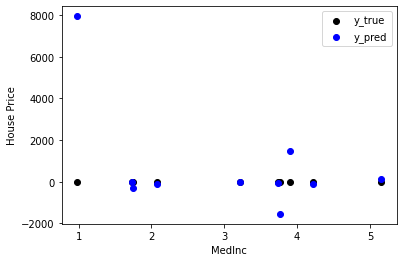

Mean squared error loss: 6780221.3559
R2 score: -8174230.8935


In [ ]:
X_new = X[n_train_points:n_train_points+n_new_points] # Pick our new data points
X_new_poly = poly.fit_transform(X_new) # create Polynomial features for X_new
X_new_poly_stded = scaler.transform(X_new_poly) # standardize X_new_poly
y_true = y[n_train_points:n_train_points+n_new_points] # Pick our new target values
y_pred = reg.predict(X_new_poly_stded) # Store our predictions

# Plot outputs
plt.scatter(X_new[:,0], y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Well, that's dissapointing. Our model is terrible. Really terrible. We would be much better off with univariate linear regression.

We have **overfit** our data - our model has been fine tuned to perfectly pick up all of the noise in the training data, which gets impressive $R^2$ scores when making predictions for the training data, but means that our model utterly fails to make accurate predictions for new data.

Do not despair, while there is no silver bullet, there are ways to make use of the power of polynomial features and multivariate models without overfitting our model. We will be exploring the methods for accurately validating your model and to prevent it from overfitting the data next week.

Just remember:

<font color="red">A high degree of polynomial features can lower the the MSE greatly against the training data. However, a low error on the training data is not always desirable, since this does not tell us anything about the performance when making predictions using new data.</font>

##3.8 Exercise 6
With this in mind, try and implement a multivariate, polynomial model on the california housing dataset that provides a good prediction but does not overfit the new data. You might also want to try changing some of the other parameters for the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) object. This may take a lot of experimentation with features and polynomial degrees to get anything better than whatever you were getting with the full multivariable regression model in Exercise 3.

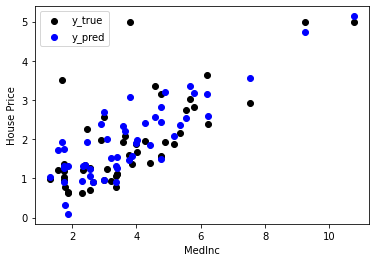

Mean squared error loss: 0.3139
R2 score: 0.7486


In [ ]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data


# So for this task we are going to be predicting the property value based on the Median Income
col = house['feature_names'] # prepare NumPy ndarrays

col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
col = ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
#col = ['MedInc', 'HouseAge', 'Population']# prepare NumPy ndarrays
X = np.array(df[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y = np.array(df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 250
n_new_points = 50

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

degree = 2 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree, interaction_only=False) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train) # Fit the poly object to the training data to make a new feature matrix
X_new_poly = poly.fit_transform(X_new) 


scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)
X_new_poly_stded = scaler.transform(X_new_poly)

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train_poly_stded, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new_poly_stded)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

# 4. Categorical feature data

So far we have only been considering feature columns that have been populated with numerical data, however it is not unusual to encounter datasets where the feature columns may include text values that have some meaning for the target predictions, however these must be converted into a numerical form somehow in order to be used by the machine learning algorithms.

We would call these categorical feature data, and converting these features into numerical values (often called 'feature encoding') is another data preprocessing operation you should be aware of when using tabular data.

##4.1 Loading in dataset

For this problem, I have created a synthetic dataset which I have uploaded to moodle. Please load this csv below.



In [ ]:
uploaded = files.upload()    # Will prompt you to select file
# Your file is now in the Colab filesystem on the left
testData = pd.read_csv('testData.csv') # Save it to a pandas dataframe

This data shows the final grade of a selection of students from 4 different schools. We have the scored from their previous two mock papers, but there are also a number of catgorical feature columns that we can't currently use.

Let's have a look at the data:

In [ ]:
# This file has all the data elements constructed already, so we can just put the entire thing into the 'data=' 
df = pd.DataFrame(data= testData)

# show the data
display(df)

,mock1,mock2,studyTime,travelTime,absence,school,finalGrade
0,67,69,241-480,61-120,No,KCI,100
1,89,87,121-240,31-60,No,KHV,94
2,43,39,241-480,61-120,No,QE2,51
3,94,89,241-480,61-120,Yes,QE2,100
4,7,14,241-480,31-60,Yes,KCI,26
...,...,...,...,...,...,...,...
395,89,83,241-480,31-60,Yes,KCI,100
396,9,8,241-480,61-120,No,QE2,17
397,78,77,241-480,31-60,No,QE2,97
398,22,22,241-480,61-120,No,KCI,61


First, let's see how good a fit we get just using the mock scores, so data that is numerical already.

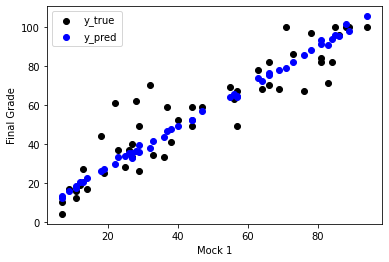

Mean squared error loss: 125.1778
R2 score: 0.8349


In [ ]:
testData_numOnly = testData.copy() # We will be making copies of the dataset as we will be making changes to the columns as we go along
tar='finalGrade'

col_fin=['mock1','mock2']

X = np.array(testData_numOnly[col_fin]) 
y = np.array(testData_numOnly[tar])


# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 350 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)


# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Mock 1')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Okay, so areound 83% $R^2$ score is a pretty strong baseline, but the categorical columns may be the key to explaining the remaining variation.

## 4.2 Label encoding


Given the original dataset, it is clear we have many categorical features. All these need to be encoded. The [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class is used to transform the categorical or string values to numerical ones (between 0 and n_classes-1).

In this case we will see what an impact the school has on peoples final grades, as there are 4 schools we should expect this column to be filled with values form '0-3'.

In [ ]:
testData_school = testData.copy() # We will be making copies of the dataset as we will be making changes to the columns as we go along

# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables (columns - 'school') using the fit_transform method. This returns the column encoded.
testData_school['school'] = lblEncoder_X.fit_transform(testData_school['school']) 

print(testData_school) # See that the 'school' column is now filled with integer values matching the 4 schools

     mock1  mock2 studyTime travelTime absence  school  finalGrade
0       67     69   241-480     61-120      No       0         100
1       89     87   121-240      31-60      No       2          94
2       43     39   241-480     61-120      No       3          51
3       94     89   241-480     61-120     Yes       3         100
4        7     14   241-480      31-60     Yes       0          26
..     ...    ...       ...        ...     ...     ...         ...
395     89     83   241-480      31-60     Yes       0         100
396      9      8   241-480     61-120      No       3          17
397     78     77   241-480      31-60      No       3          97
398     22     22   241-480     61-120      No       0          61
399     12     17   241-480      31-60     Yes       3          19

[400 rows x 7 columns]


Now let's try including this new numerical feature in our model.

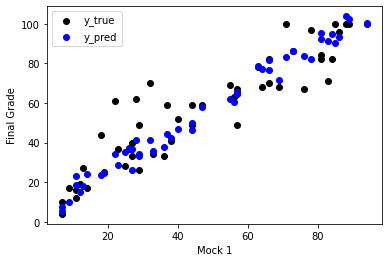

Mean squared error loss: 119.2211
R2 score: 0.8428


In [ ]:
tar='finalGrade'
col_fin=['mock1','mock2','school']

X = np.array(testData_school[col_fin])
y = np.array(testData_school[tar])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 350 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)


# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Mock 1')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

The score has improved, but not by much in this case - but there are still lots of other categorical features we haven't used yet.

##4.3 Range based features

Two of our columns (studyTime and travelTime) both provide us with value ranges which ahve been aggregated. These can be just treated like any other category with feature encoding, but in these cases you also have the option of just taking the middle value as the numeric value you will use.

Below is one way that you can do this, but as is often the case in python there will be other (possibly better!) ways you could approach this task.

,mock1,mock2,studyTime,travelTime,absence,school,finalGrade,studyTimeAve
0,67,69,241-480,61-120,No,KCI,100,360.5
1,89,87,121-240,31-60,No,KHV,94,180.5
2,43,39,241-480,61-120,No,QE2,51,360.5
3,94,89,241-480,61-120,Yes,QE2,100,360.5
4,7,14,241-480,31-60,Yes,KCI,26,360.5
...,...,...,...,...,...,...,...,...
395,89,83,241-480,31-60,Yes,KCI,100,360.5
396,9,8,241-480,61-120,No,QE2,17,360.5
397,78,77,241-480,31-60,No,QE2,97,360.5
398,22,22,241-480,61-120,No,KCI,61,360.5


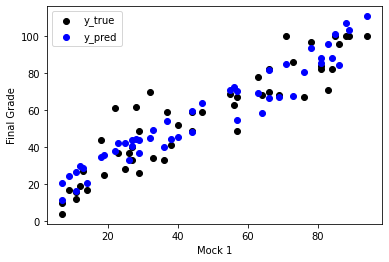

Mean squared error loss: 111.7442
R2 score: 0.8526


In [ ]:
testData_studyTimeAve = testData.copy() # We will be making copies of the dataset as we will be making changes to the columns as we go along

# For now we are just going to test the impact of studyTime
testData_studyTimeAve["studyTime"]=testData_studyTimeAve["studyTime"].astype('string')

# Split the column using the .str.split function
splitST = testData_studyTimeAve["studyTime"].str.split("-", n = 1, expand = True)
splitST = splitST.astype(float) # Make sure data is numeric
# making separate column from split data frames
testData_studyTimeAve["studyTimeAve"]= 0.5*(splitST[0]+splitST[1])

display(testData_studyTimeAve)

tar='finalGrade'

col_fin=['mock1','mock2','studyTimeAve']


X = np.array(testData_studyTimeAve[col_fin])
y = np.array(testData_studyTimeAve[tar])


# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 350 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)


# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Mock 1')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Again, not an amazing increase, but we are still explaining more of the variation.

##4.4 One Hot Encoding

The final encoding strategy I'll talk about today is [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). For each feature, this expands the columns in the dataset to have one column per category using a 0/1 indicator to mark which category corresponds to each data point.

There is no benefit to using OHE for categorical features with only two catgories (as you will just end up with two columns where the 1's and 0's are inverted, which adds nothing to the model).

Let's try using the `studyTime` feature again to see how differnt a solution we get when comparge to the range average.

If you are going to be using OHE on a larger scale for your data, I would advise setting up a pipeline to streamline things, as in this example I have just manually added all of the encoded columns to our dataframe.

The categories are:  [array(['0-60', '121-240', '241-480', '61-120'], dtype=object)]


,mock1,mock2,studyTime,travelTime,absence,school,finalGrade,studyTime_0,studyTime_1,studyTime_2,studyTime_3
0,67,69,241-480,61-120,No,KCI,100,0.0,0.0,1.0,0.0
1,89,87,121-240,31-60,No,KHV,94,0.0,1.0,0.0,0.0
2,43,39,241-480,61-120,No,QE2,51,0.0,0.0,1.0,0.0
3,94,89,241-480,61-120,Yes,QE2,100,0.0,0.0,1.0,0.0
4,7,14,241-480,31-60,Yes,KCI,26,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,89,83,241-480,31-60,Yes,KCI,100,0.0,0.0,1.0,0.0
396,9,8,241-480,61-120,No,QE2,17,0.0,0.0,1.0,0.0
397,78,77,241-480,31-60,No,QE2,97,0.0,0.0,1.0,0.0
398,22,22,241-480,61-120,No,KCI,61,0.0,0.0,1.0,0.0


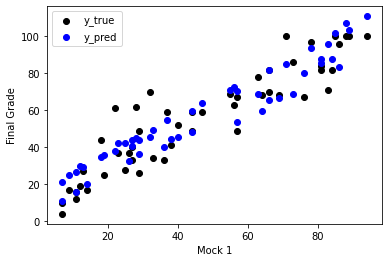

Mean squared error loss: 111.0716
R2 score: 0.8535


In [ ]:
# create dataset copy for testing purposes
testDataOHE = testData.copy()

# create OneHotEncoder object
oneHotEncoder = OneHotEncoder()  
# and fit the OneHotEncoder object to feature studyTime
onehot_enc = oneHotEncoder.fit(testDataOHE[['studyTime']])           
print('The categories are: ', onehot_enc.categories_)

# dum is an array of shape (391,2) containing the one-hot encoding of the feature Gender of the dataframe train_dataset_no_nans
# we make a temporary object to be able to manipulate the extra number of columns
OHT = onehot_enc.transform(testDataOHE[['studyTime']]).toarray()     

# we add to the encoded columns to our dataset
testDataOHE['studyTime_0'] = OHT[:,0]   
testDataOHE['studyTime_1'] = OHT[:,1]     
testDataOHE['studyTime_2'] = OHT[:,2]   
testDataOHE['studyTime_3'] = OHT[:,3]   

# chack that the new columns correspond to the correct time range (note, they may not be split in order, you can see the order they were split in the print statement above)
display(testDataOHE)

tar='finalGrade'

col_fin=['mock1','mock2','studyTime_0','studyTime_1','studyTime_2','studyTime_3']

X = np.array(testDataOHE[col_fin])
y = np.array(testDataOHE[tar])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 350 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)


# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Mock 1')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Okay, so in this case our one-hot encoded features slightly ourperform taking the range average, but not by a significant amount.

As is often the case in ML, which method will give you the best results when dealing with catgorical data will vary based on your dataet, so it is always worth experimenting with different encoding methods for your categorical data when testing your initial models.

##4.5 - Exercise 7

So far we have only looked at two of our categorical features.
Using all of the data, see how accurate a prediction of the final grade you can obtain (I was able to get around 95% $R^2$, but maybe you can do better!)

Some things to try:

*   See how performance changes with differnt encoding methods for each categorical feature (Label Encoding, One-hot encoding, taking the range average).
*   You can use different encoding methods for different features if appropriate.
*  You can also use polynomial feature with these categorical features to further improve the accuracy



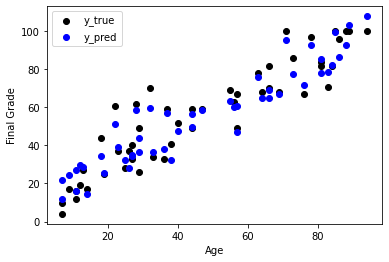

Mean squared error loss: 39.7091
R2 score: 0.9476


In [ ]:
##############################################################
# Your code here
##############################################################

testData_enc = testData.copy() #note we are using the dataset with no missing values

tar='finalGrade'

# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
testData_enc['studyTime'] = lblEncoder_X.fit_transform(testData_enc['studyTime']) 
testData_enc['travelTime'] = lblEncoder_X.fit_transform(testData_enc['travelTime']) 
testData_enc['absence'] = lblEncoder_X.fit_transform(testData_enc['absence']) 
testData_enc['school'] = lblEncoder_X.fit_transform(testData_enc['school']) 

col_fin=['mock1','mock2','studyTime','travelTime','absence','school']

X = np.array(testData_enc[col_fin])
y = np.array(testData_enc[tar])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 350 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

degree = 3 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree, interaction_only=False) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train) # Fit the poly object to the training data to make a new feature matrix
X_new_poly = poly.fit_transform(X_new) 

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)
X_new_poly_stded = scaler.transform(X_new_poly)

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train_poly_stded, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new_poly_stded)

X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('Age')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))